In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))


# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

df['Targ'] = df['MAR'] > 3.5
data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient', 'MAR']]


In [3]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_output')

analyzer.run()

/home/oem/Documents/CDI/AutoML/AutoML/analyzer.py:70: UserWarning: Categorical columns not defined, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['patient', 'OAR', 'Targ']
Continuous: ['APL', '95HD', 'MAR', 'VolDice', 'FNPL', 'FNV', 'SurfDist', 'JaccardIndex']
  warnings.warn(f'Categorical columns not defined, used a heuristic to define categorical and continuous columns. Please review!\nCategorical: {self.categorical_columns}\nContinuous: {self.continuous_columns}')


Mapping file not found checking for outliers in categorical variables...
  - No Outliers found in patient
  - No Outliers found in OAR
  - No Outliers found in Targ
╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ 95HD, mean (SD)         │                │ 0         │ 6.2 (21.9)      │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ VolDice, mean (SD)      │                │ 0         │ 0.8 (0.1)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist, mean (SD)     │                │ 0         │ 1.3 (1.9)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ JaccardI

No path specified. Models will be saved in: "AutogluonModels/ag-20240717_191424"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #188-Ubuntu SMP Wed Jan 10 09:51:01 UTC 2024
CPU Count:          4
Memory Avail:       0.64 GB / 7.61 GB (8.4%)
Disk Space Avail:   602.09 GB / 915.32 GB (65.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast traini

	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 4 | ['95HD', 'VolDice', 'SurfDist', 'JaccardIndex']
		('int', [])   : 3 | ['APL', 'FNPL', 'FNV']
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 4 | ['95HD', 'VolDice', 'SurfDist', 'JaccardIndex']
		('int', [])   : 3 | ['APL', 'FNPL', 'FNV']
	0.1s = Fit runtime
	7 features in original data used to generate 7 features in processed data.
	Train Data (Processed) Memory Usage: 0.02 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.14s ...
AutoGluon will gauge predictive performance using evaluation metric: 'roc_auc'
	This metric expects predicte


Model Leaderbord

                  model  score_val eval_metric
0   WeightedEnsemble_L2   0.800000     roc_auc
1        NeuralNetTorch   0.775000     roc_auc
2              CatBoost   0.766667     roc_auc
3              LightGBM   0.756667     roc_auc
4         LightGBMLarge   0.751111     roc_auc
5               XGBoost   0.736667     roc_auc
6            LightGBMXT   0.735556     roc_auc
7        KNeighborsUnif   0.718333     roc_auc
8      RandomForestEntr   0.710000     roc_auc
9      RandomForestGini   0.707778     roc_auc
10       ExtraTreesEntr   0.707778     roc_auc
11      NeuralNetFastAI   0.701111     roc_auc
12       ExtraTreesGini   0.698889     roc_auc
13       KNeighborsDist   0.691667     roc_auc


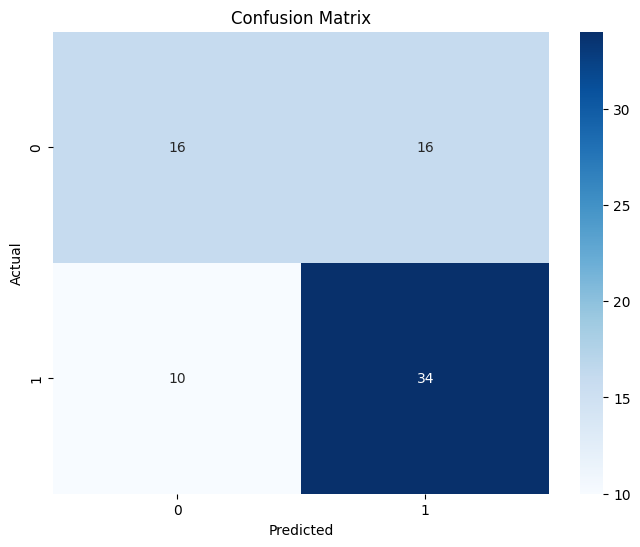

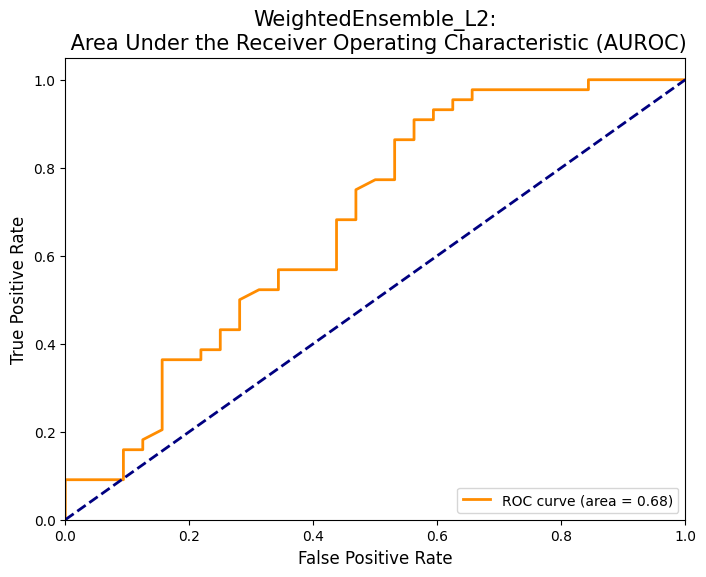

Computing feature importance via permutation shuffling for 7 features using 76 rows with 5 shuffle sets...
	1.84s	= Expected runtime (0.37s per shuffle set)
	0.28s	= Actual runtime (Completed 5 of 5 shuffle sets)


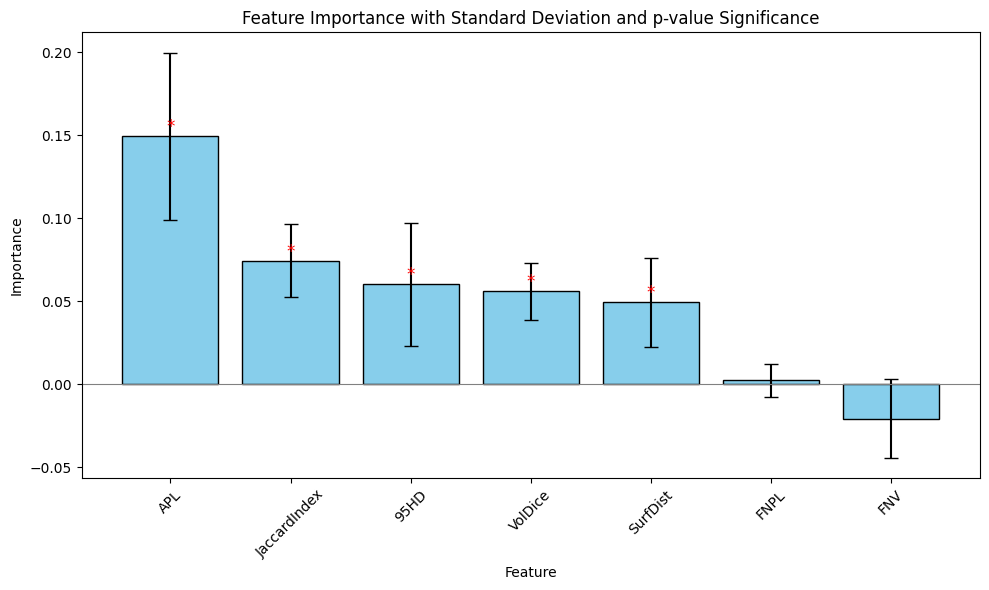

In [4]:
from AutoML.trainer import AutoMLSupervised

trainer = AutoMLSupervised(task='binary')
trainer.run(data, 'Targ', exclude=['OAR', 'patient', 'MAR'], stratify_on='OAR')

In [4]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'Head-Neck-PET-CT-clinical copy.csv')
df = pd.read_csv(data_file_path)

df.head()

,Patient #,Sex,Age,Primary Site,T-stage,N-stage,M-stage,TNM group stage,HPV status,Time – diagnosis to diagnosis (days),...,Time – diagnosis to end treatment (days),Therapy,Surgery,Time – diagnosis to last follow-up(days),Locoregional,Distant,Death,Time – diagnosis to LR (days),Time – diagnosis to DM (days),Time – diagnosis to Death (days)
0,HN-HGJ-001,M,79,Larynx,T3,N0,M0,stage III,-,0,...,140,chemo radiation,0.0,2123,1,0,0,692.0,NaN,NaN
1,HN-HGJ-002,M,41,Nasopharynx,T1,N1,M0,stage IIB,-,0,...,108,chemo radiation,0.0,2114,1,0,0,918.0,NaN,NaN
2,HN-HGJ-003,M,75,Larynx,T3,N2b,M0,stage IVA,NaN,0,...,113,chemo radiation,0.0,1098,1,1,1,441.0,441.0,1098.0
3,HN-HGJ-004,M,53,Nasopharynx,T3,N1,M0,stage III,NaN,0,...,85,radiation,0.0,2974,0,0,0,NaN,NaN,NaN
4,HN-HGJ-005,M,74,Nasopharynx,T1,N1,M0,stage IIB,-,0,...,120,chemo radiation,0.0,2509,0,0,1,NaN,NaN,2509.0


In [5]:
from AutoML.analyzer import AutoMLAnalyzer

categorical = ['Surgery', 'Primary Site', 'HPV status', 'TNM group stage', 'N-stage', 'T-stage', 'Therapy', 'Sex', 'Patient #', 'M-stage', 'Time – diagnosis to diagnosis (days)', 'Locoregional', 'Distant', 'Death']

analyzer = AutoMLAnalyzer(df, output_dir='./analysis_pet', categorical=categorical)

analyzer.run()

Mapping file not found checking for outliers in categorical variables...
  - No Outliers found in Surgery
  - No Outliers found in Primary Site
  - No Outliers found in HPV status
  - No Outliers found in TNM group stage
  - No Outliers found in N-stage
  - No Outliers found in T-stage
  - No Outliers found in Therapy
  - Outliers found in Sex: ['m: 1 out of 298']
  - No Outliers found in Patient #
  - Outliers found in M-stage: ['Mx: 4 out of 298']
  - No Outliers found in Time – diagnosis to diagnosis (days)
  - No Outliers found in Locoregional
  - No Outliers found in Distant
  - No Outliers found in Death
╒═══════════════════════════════════════════════════════╤═════════════════╤═══════════╤════════════════╕
│                                                       │                 │ Missing   │ Overall        │
╞═══════════════════════════════════════════════════════╪═════════════════╪═══════════╪════════════════╡
│ n                                                     │          